In [1]:
from other_methods_implemenations  import *
import pandas as pd
import numpy as np


c:\Users\mikol\Desktop\Master thesis\mcut_feature_selection\mcut_venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_pickle('data/df')

In [3]:
train = df.loc['2021':'2022']
test = df.loc['2023':'2023-3']

In [4]:
# res2 = pd.Series()
# mcut_feature_selection(df, 1, 'marg', np.mean, 7, mcut, 0, 100, 5)
# for i in range(1, 9):
#     start = pd.Timestamp.now(tz = 'cet')
#     feats = mcut_feature_selection(train, i, 'marg', np.mean, 7, mcut, 1, 100, 5)
#     res2.loc[f'folds_{i}'] = ((pd.Timestamp.now(tz = 'cet') - start).total_seconds(), len(feats), feats)
#     del feats

In [5]:
res2 = pd.read_pickle('experiment_3_results_df_1timefolds.pkl')

In [6]:
res2

folds_1    (513.571912, 10, [feat_5, feat_23, feat_6, fea...
folds_2    (650.616675, 9, [feat_5, feat_46, feat_6, feat...
folds_3    (631.485931, 8, [feat_5, feat_52, feat_9, feat...
folds_4    (371.344651, 8, [feat_5, feat_23, feat_46, fea...
folds_5    (331.932841, 7, [feat_5, feat_32, feat_6, feat...
folds_6    (302.150374, 5, [feat_5, feat_6, feat_11, feat...
folds_7    (308.890442, 8, [feat_5, feat_3, feat_0, feat_...
folds_8    (706.13053, 11, [feat_5, feat_9, feat_32, feat...
dtype: object

In [7]:
# res2 = pd.Series()` is a comment in Python code. It is used to document or provide context about the code. In this case, it seems like the intention was to create an empty pandas Series object named `res2`, but it is currently commented out and not being executed as code.
# res2.to_pickle('experiment_3_results_df_1timefolds.pkl')

In [8]:
import datetime as dt
import statsmodels.api as sm

def backtest_OLS(df, cols):
    
    d = df[cols + ['marg']].dropna()
    d['pred_OLS'] = np.nan
    pvs = pd.DataFrame(columns=cols)
    
    for date in pd.date_range('2022-12-31', '2023-04-01', freq='D', tz = 'CET'):

        start_date = date - dt.timedelta(days = 365)

        train = d.loc[(start_date) : (date - dt.timedelta(1) - dt.timedelta(hours=1))][cols + ['marg']].dropna()
        test = d.loc[(date+dt.timedelta(days=1)):(date +dt.timedelta(days=1) +dt.timedelta(hours=23))]
        
        if (train.empty) | (test.empty):
            continue
        
        model = sm.OLS(train.marg, train[cols]).fit()
        d.loc[test.index,'pred_OLS'] = model.predict(test[cols])
        pvs.loc[date] = model.pvalues
        
    return d, pvs

In [9]:
res2 = pd.read_pickle('experiment_3_results_df_1timefolds.pkl')

In [30]:
p = backtest_OLS(df, res2[f'folds_{i}'][2])[1]

In [10]:
r = pd.DataFrame()
for i in range(1, 9):
    bt = backtest_OLS(df, res2[f'folds_{i}'][2])[1].mean().round(2)
    r.loc[i,'mean_pvalue'] = bt.mean()
    r.loc[i,'max_pvalue'] = bt.max()
    r.loc[i,'min_pvalue'] = bt.min()

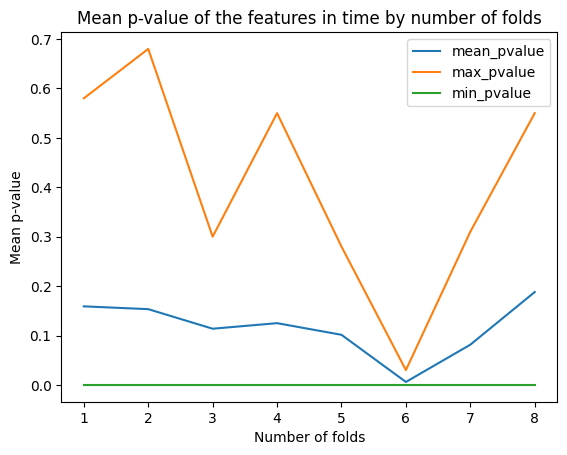

In [11]:
r.plot()
import matplotlib.pyplot as plt
plt.title('Mean p-value of the features in time by number of folds')
plt.xlabel('Number of folds')
plt.ylabel('Mean p-value')
plt.savefig('charts\exp3.png', format='png')


<Axes: >

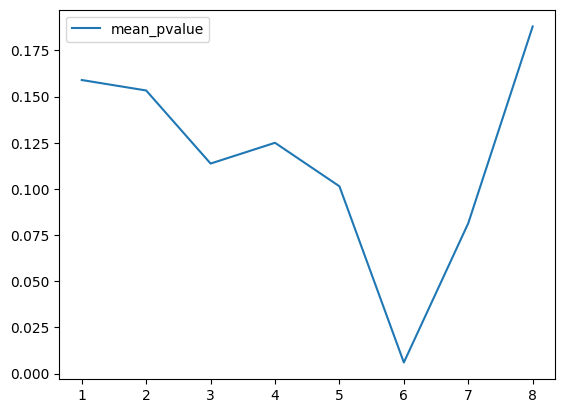

In [12]:
r[['mean_pvalue']].plot()

<Axes: >

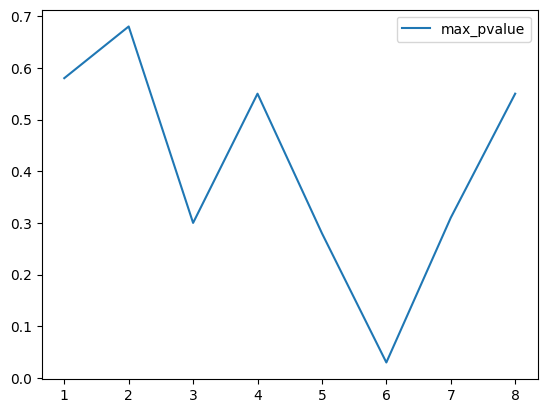

In [ ]:
r[['max_pvalue']].plot()

<Axes: >

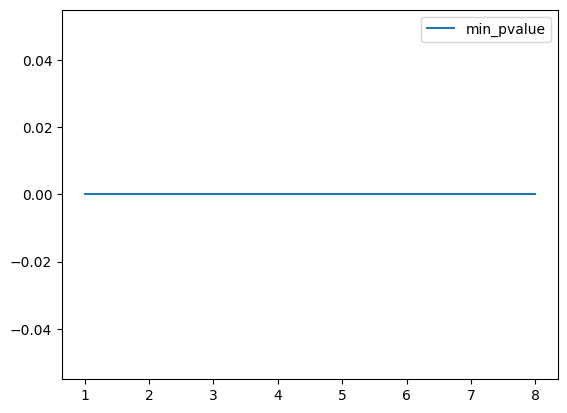

In [ ]:
r[['min_pvalue']].plot()